In [ ]:
import sys
import random
class MatrixMult:
    nmbre_matr = 1
    dimensions = []
    MAX_VALUE = sys.maxsize

    def __init__(self, dimensions, nmbre_matr):
        self.nmbre_matr = nmbre_matr
        self.dimensions = dimensions
        self.best_pivot = [[0 for i in range(nmbre_matr+1)] for j in range(nmbre_matr+1)]
        self.pivots_in_postorder = []

    def best_n_mult(self,high):
        print(high)
        best_value = [[0 for i in range(high+1)] for j in range(high+1)]
        h=2
        while h<=high:
            l=h-2
            while l>=0:
                min_n_mult = self.MAX_VALUE+1
                i=l+1
                while i<=h-1:
                    n_mult = self.dimensions[l]*self.dimensions[i]*self.dimensions[h] + best_value[l][i] + best_value[i][h]
                    if min_n_mult > n_mult:
                        min_n_mult = n_mult
                        self.best_pivot[l][h] = i
                    i+=1
                best_value[l][h] = min_n_mult
                print(l,h,best_value[l][h])
                l-=1
            h+=1
        print(best_value)
        return best_value[0][high]

    def write_pivots_in_postorder(self,l,h):
        if ( l+1 < h ):
            b = self.best_pivot[l][h]
            self.write_pivots_in_postorder(l, b)
            self.write_pivots_in_postorder(b, h)
            self.pivots_in_postorder.append(b)
            print(b)

    # A COMPLETER
    def multiply(self, A, B):
        """Multiplication de deux matrices."""
        rows_A, cols_A = len(A), len(A[0])
        rows_B, cols_B = len(B), len(B[0])
        if cols_A != rows_B:
            raise ValueError("Les dimensions des matrices ne sont pas compatibles pour la multiplication.")

        # Créer une matrice résultat avec les bonnes dimensions
        C = [[0 for row in range(cols_B)] for col in range(rows_A)]

        for i in range(rows_A):
            for j in range(cols_B):
                for k in range(cols_A):
                    C[i][j] += A[i][k] * B[k][j]

        return C

    def do_operation(self, pivots, matrices):
        """Effectue la multiplication des matrices en suivant l'ordre des pivots."""
        order = pivots[:]
        current_matrices = matrices[:]

        while len(order) > 0:
            pivot = order.pop(0) - 1
            matrix1 = current_matrices[pivot]
            matrix2 = current_matrices.pop(pivot + 1)
            result = self.multiply(matrix1, matrix2)
            current_matrices[pivot] = result

        return current_matrices[0]


In [ ]:
# Nous vous mettons à disposition une matrice pour que vous puissiez tester votre algorithme de multiplication matricielle.
# Vous devez quand même implémenter la partie "aléatoire" demandée et la tester vous-même.
dimensions = [3, 3, 3, 3, 2, 2]
nmbre_matr = 5
print("Dimensions vector:")
print(nmbre_matr, dimensions)
print()

print("\"Random\" matrices: ")
# Vous pouvez convertir l'équivalent de cette matrice 3D en la structure de données que vous avez implémentée
matrices = [[[10,6,19],[7,16,13],[8,12,18]],[[13,20,14],[6,8,5],[14,3,9]],[[15,18,1],[7,7,6],[6,20,17]],[[4,1],[14,14],[15,9]],[[6,10],[17,17]]]
print(matrices)
print()
a = MatrixMult(dimensions, nmbre_matr)
print("best_n_mult: ")
a.best_n_mult(nmbre_matr)
print()
print("write_pivots_in_postorder: ")
a.write_pivots_in_postorder( 0, nmbre_matr)
print()

# Fonction qui multiplie les matrices dans le bon ordre.
# Vous n'êtes pas obligé de l'utiliser et vous pouvez utiliser une autre fonction que vous avez créée.
# Si c'est le cas, apportez les modifications nécessaires ici pour que l'assertion fonctionne
pivots = a.pivots_in_postorder
final_matrix = a.do_operation(pivots, matrices)

print("Final matrix:")
print(final_matrix)
assert final_matrix == [[7782820,9373872],[6874034,8281554],[7700480,9274968]]

In [1]:
from PIL import Image, ImageDraw, ImageFont
import random

# Create a new blank image with a gradient background
def create_gradient_cover():
    width, height = 800, 1200  # Dimensions for the cover
    image = Image.new("RGB", (width, height), "#000000")  # Black base
    draw = ImageDraw.Draw(image)

    # Gradient background: Purple to Black
    for y in range(height):
        r = int(128 + (127 * y / height))  # Purple gradient
        g = int(0)
        b = int(255 - (255 * y / height))
        draw.line([(0, y), (width, y)], fill=(r, g, b))

    return image

# Add binary numbers to the cover
def add_binary_numbers(image):
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 20)  # Use a simple font
    for _ in range(300):  # Add 300 binary numbers
        x = random.randint(0, image.width // 2)  # Confined to half the cover
        y = random.randint(0, image.height)
        binary = random.choice(["0", "1"])
        draw.text((x, y), binary, fill=(255, 255, 255, 100), font=font)  # Semi-transparent white

    return image

# Add text to the cover
def add_text(image):
    draw = ImageDraw.Draw(image)
    title_font = ImageFont.truetype("arial.ttf", 80)
    subtitle_font = ImageFont.truetype("arial.ttf", 40)
    author_font = ImageFont.truetype("arial.ttf", 30)

    # Title
    title_text = "Code Alchemy"
    text_width, text_height = draw.textsize(title_text, font=title_font)
    draw.text(((image.width - text_width) // 2, 200), title_text, fill="white", font=title_font)

    # Subtitle
    subtitle_text = "Python for the Modern Programmer"
    text_width, text_height = draw.textsize(subtitle_text, font=subtitle_font)
    draw.text(((image.width - text_width) // 2, 300), subtitle_text, fill="white", font=subtitle_font)

    # Author Name
    author_text = "By AHONON Gobi"
    text_width, text_height = draw.textsize(author_text, font=author_font)
    draw.text(((image.width - text_width) // 2, 400), author_text, fill="white", font=author_font)

    return image

# Add geometric patterns or lines
def add_geometric_patterns(image):
    draw = ImageDraw.Draw(image)
    width, height = image.size

    for _ in range(50):  # Add 50 random lines
        x1, y1 = random.randint(0, width), random.randint(0, height)
        x2, y2 = random.randint(0, width), random.randint(0, height)
        draw.line([(x1, y1), (x2, y2)], fill=(255, 255, 255, 50), width=2)  # Semi-transparent white

    return image

# Generate the book cover
def generate_cover():
    cover = create_gradient_cover()
    cover = add_binary_numbers(cover)
    cover = add_geometric_patterns(cover)
    cover = add_text(cover)
    cover.show()
    cover.save("python_book_cover.png")  # Save the cover

generate_cover()


OSError: cannot open resource

ML - Decision Boundary for my book

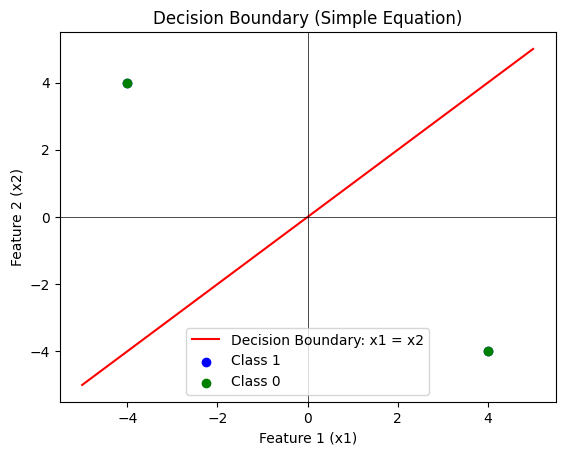

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decision boundary: x1 = x2
x1 = np.linspace(-5, 5, 100)  # Range for x1
x2 = x1  # x1 = x2, the decision boundary

# Plot the line
plt.plot(x1, x2, label='Decision Boundary: x1 = x2', color='red')

# Plot points on either side of the boundary
plt.scatter([-4, 4], [4, -4], color='blue', label='Class 1')
plt.scatter([4, -4], [-4, 4], color='green', label='Class 0')

# Add labels and legend
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Decision Boundary (Simple Equation)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

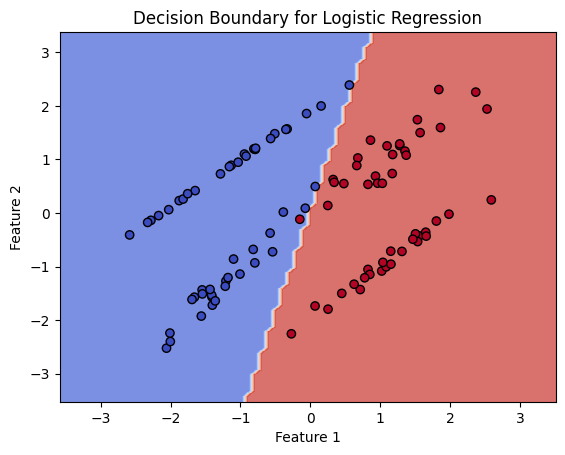

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a simple binary classification dataset with 2 informative features and 2 total features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class probabilities for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


# Sigmoid Function  

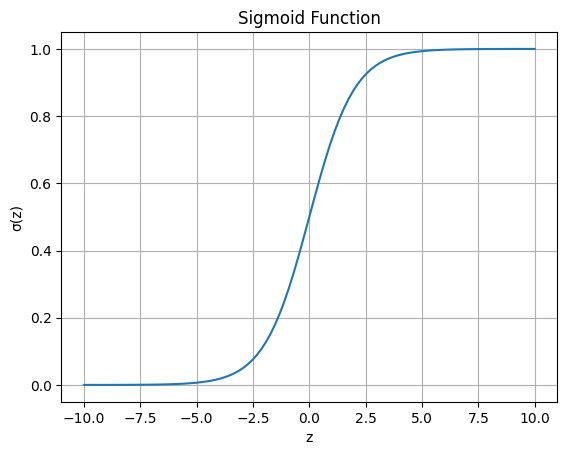

In [5]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100) # Range of z values from -10 to 10, Z = W*X + b so Z here is a linear function of X
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid()
plt.show()

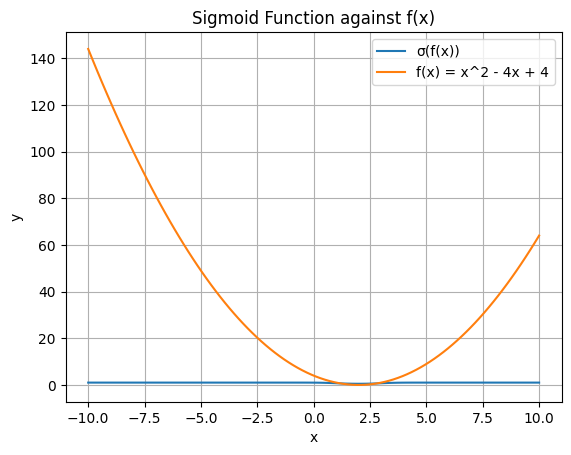

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the input x wit the equation f(x) = x^2 - 4x + 4 against the sigmoid function
x = np.linspace(-10, 10, 100)
y = x**2 - 4*x + 4
sigmoid = 1 / (1 + np.exp(-y))

plt.plot(x, sigmoid, label='σ(f(x))')
plt.plot(x, y, label='f(x) = x^2 - 4x + 4')
plt.title('Sigmoid Function against f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()



In [ ]:
# Plot model and data

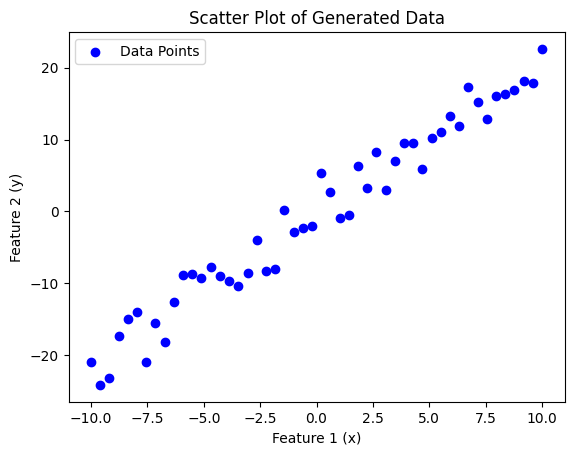

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function
target_function = lambda x: 2 * x - 1

# Define a function to generate noise
generate_noise = lambda: np.random.normal(0, 3)  # Mean=0, StdDev=3

# Generate data points
data = [[x, target_function(x) + generate_noise()] for x in np.linspace(-10, 10, 50)]

# Convert data to a NumPy array for easier handling
data = np.array(data)

# Separate the data into input (x) and output (y)
x_values = data[:, 0]
y_values = data[:, 1]

# Plot the raw data
plt.scatter(x_values, y_values, color='blue', label='Data Points')
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.title('Scatter Plot of Generated Data')
plt.legend()
plt.show()

# Data with Decision Boundary

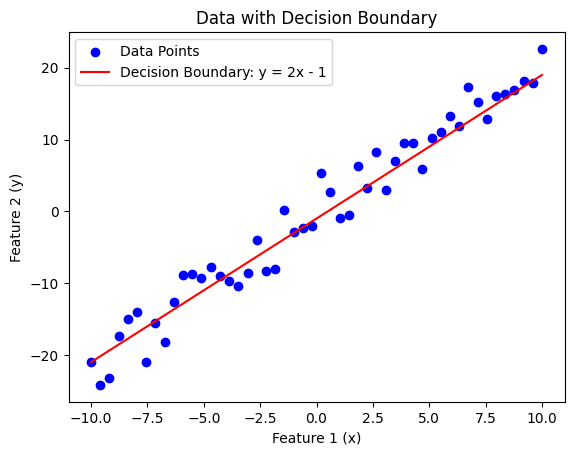

In [8]:
# Define the decision boundary
boundary_x = np.linspace(-10, 10, 100)  # Generate x values for the boundary
boundary_y = target_function(boundary_x)  # Compute y values using the target function

# Plot the data points
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the decision boundary
plt.plot(boundary_x, boundary_y, color='red', label='Decision Boundary: y = 2x - 1')

# Add labels and legend
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.title('Data with Decision Boundary')
plt.legend()
plt.show()

# Data with Labels and Decision Boundary

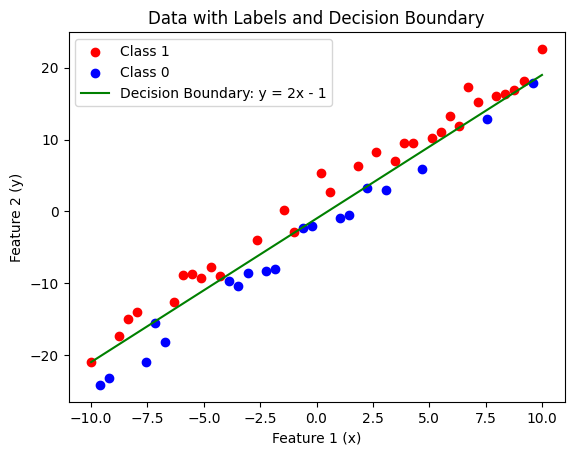

In [9]:
# Assign labels based on the decision boundary
labels = [1 if y > target_function(x) else 0 for x, y in zip(x_values, y_values)]

# Plot the data with labels
for x, y, label in zip(x_values, y_values, labels):
    if label == 1:
        plt.scatter(x, y, color='red', label='Class 1' if 'Class 1' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(x, y, color='blue', label='Class 0' if 'Class 0' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot the decision boundary
plt.plot(boundary_x, boundary_y, color='green', label='Decision Boundary: y = 2x - 1')

# Add labels and legend
plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.title('Data with Labels and Decision Boundary')
plt.legend()
plt.show()

# Decision Boundary Visualization for binary classification

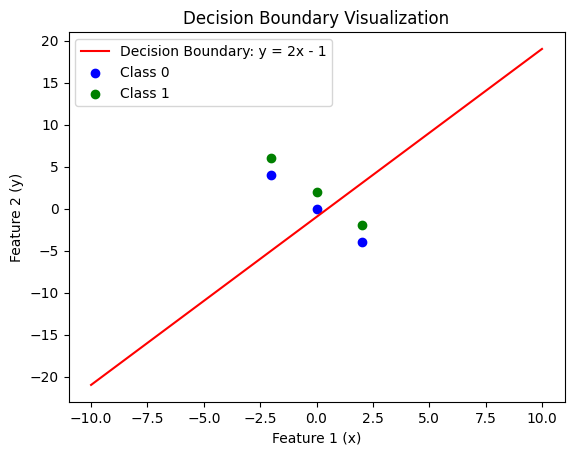

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data points
x = np.linspace(-10, 10, 100)
y = 2 * x - 1  # Decision boundary: y = 2x - 1

# Plot decision boundary
plt.plot(x, y, color='red', label='Decision Boundary: y = 2x - 1')

# Scatter points above and below the boundary
plt.scatter([-2, 0, 2], [4, 0, -4], color='blue', label='Class 0')
plt.scatter([-2, 0, 2], [6, 2, -2], color='green', label='Class 1')

plt.xlabel('Feature 1 (x)')
plt.ylabel('Feature 2 (y)')
plt.title('Decision Boundary Visualization')
plt.legend()
plt.show()

# Overfitting and Underfitting Visualization

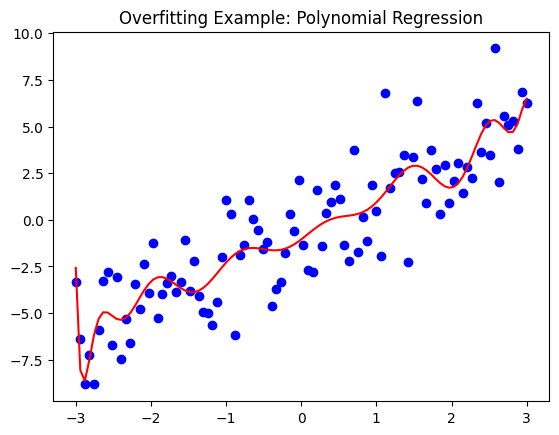

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data
X = np.linspace(-3, 3, 100)
y = 2 * X - 1 + np.random.normal(0, 2, 100)  # Linear data with noise

# Overfitting: High-degree polynomial
degree = 15
poly_coeff = np.polyfit(X, y, degree)
poly_model = np.poly1d(poly_coeff)

plt.scatter(X, y, color='blue')  # Data points
plt.plot(X, poly_model(X), color='red')  # Overfitted model
plt.title("Overfitting Example: Polynomial Regression")
plt.show()

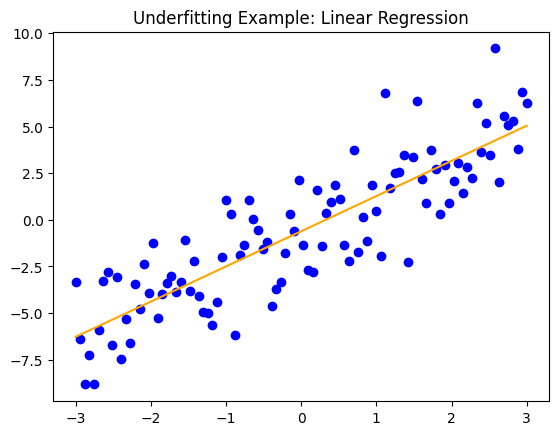

In [12]:
linear_coeff = np.polyfit(X, y, 1)
linear_model = np.poly1d(linear_coeff)

plt.scatter(X, y, color='blue')  # Data points
plt.plot(X, linear_model(X), color='orange')  # Underfitted model
plt.title("Underfitting Example: Linear Regression")
plt.show()

# Decision tree

In [13]:
data = [
    [2.771244718, 1.784783929, 0],
    [1.728571309, 1.169761413, 0],
    [3.678319846, 2.81281357, 0],
    [3.961043357, 2.61995032, 0],
    [2.999208922, 2.209014212, 0],
    [7.497545867, 3.162953546, 1],
    [9.00220326, 3.339047188, 1],
    [7.444542326, 0.476683375, 1],
    [10.12493903, 3.234550982, 1],
    [6.642287351, 3.319983761, 1]
]

import numpy as np

# Calculate Gini Impurity for a split
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / size
            score += proportion ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Split the dataset based on an attribute and value
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Find the best split
def get_best_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Create a terminal node
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Create child splits for a node
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_best_split(left)
        split(node['left'], max_depth, min_size, depth + 1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_best_split(right)
        split(node['right'], max_depth, min_size, depth + 1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_best_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Make predictions with the tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

# Example: Building and testing the decision tree
max_depth = 3
min_size = 1
tree = build_tree(data, max_depth, min_size)

# Test predictions
for row in data:
    prediction = predict(tree, row)
    print(f"Expected: {row[-1]}, Predicted: {prediction}")

Expected: 0, Predicted: 0
Expected: 0, Predicted: 0
Expected: 0, Predicted: 0
Expected: 0, Predicted: 0
Expected: 0, Predicted: 0
Expected: 1, Predicted: 1
Expected: 1, Predicted: 1
Expected: 1, Predicted: 1
Expected: 1, Predicted: 1
Expected: 1, Predicted: 1


# Perceptron

In [14]:
# Define the activation function
def sign(x):
    return 1 if x >= 0 else -1

# Perceptron Algorithm
def perceptron(X, y, learning_rate=0.1, max_iter=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights
    bias = 0  # Initialize bias

    for _ in range(max_iter):
        for idx, x_i in enumerate(X):
            # Compute the linear combination
            linear_output = np.dot(x_i, weights) + bias
            y_pred = sign(linear_output)

            # Update weights if prediction is incorrect
            if y[idx] != y_pred:
                update = learning_rate * (y[idx] - y_pred)
                weights += update * x_i
                bias += update

    return weights, bias

# Example Dataset (Linearly Separable)
X = np.array([
    [2, 3],
    [1, 1],
    [5, 4],
    [6, 1]
])
y = np.array([1, -1, 1, -1])  # Labels (+1 or -1)

# Train the Perceptron
weights, bias = perceptron(X, y)

# Print Results
print(f"Weights: {weights}, Bias: {bias}")

# Make a prediction
sample = np.array([3, 3])
prediction = sign(np.dot(sample, weights) + bias)
print(f"Prediction for {sample}: {prediction}")

Weights: [-1.   1.4], Bias: -0.4
Prediction for [3 3]: 1


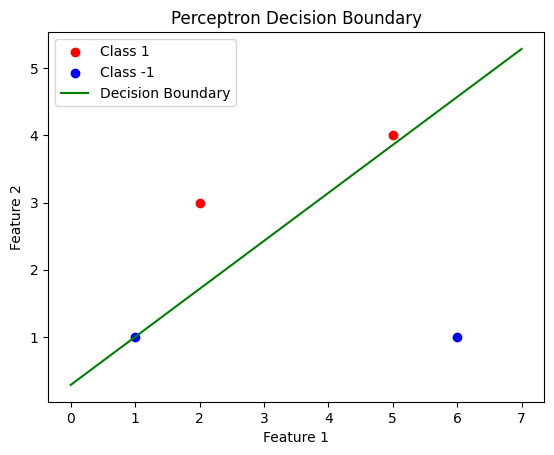

In [15]:
import matplotlib.pyplot as plt

# Plot data points
for idx, point in enumerate(X):
    plt.scatter(point[0], point[1], c='red' if y[idx] == 1 else 'blue', label=f"Class {y[idx]}" if idx < 2 else "")

# Define decision boundary
x_values = np.linspace(0, 7, 100)
y_values = -(weights[0] * x_values + bias) / weights[1]

# Plot decision boundary
plt.plot(x_values, y_values, color='green', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()

In [20]:
import pandas as pd

# Example dataset
data = {'Age': [25, 30, 35, None, 40],
        'Income': [50000, 60000, None, 70000, 80000]}
df = pd.DataFrame(data)

# Fill missing values with the mean
df['Income'].fillna(df['Income'].mean(), inplace=True)

df

,Age,Income
0,25.0,50000.0
1,30.0,60000.0
2,35.0,65000.0
3,NaN,70000.0
4,40.0,80000.0


In [22]:
# Example dataset with duplicates
data = {'Name': ['Alice', 'Bob', 'Alice', 'Charlie'],
        'Age': [25, 30, 25, 35]}
df = pd.DataFrame(data)

# Remove duplicate rows
df = df.drop_duplicates()

df

,Name,Age
0,Alice,25
1,Bob,30
3,Charlie,35


In [23]:
# Example dataset
data = {'Age': [25, 30, 35, 1000, 40]}
df = pd.DataFrame(data)

# Calculate the IQR (Interquartile Range)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
df

,Age
0,25
1,30
2,35
4,40


In [24]:
# Example dataset with categorical data
data = {'Gender': ['Male', 'Female', 'Female', 'Male']}
df = pd.DataFrame(data)

# One-hot encode the 'Gender' column
df_encoded = pd.get_dummies(df['Gender'], prefix='Gender')

print(df_encoded)

   Gender_Female  Gender_Male
0          False         True
1           True        False
2           True        False
3          False         True


In [25]:

from sklearn.preprocessing import LabelEncoder

# Example dataset with categorical data
data = {'Gender': ['Male', 'Female', 'Female', 'Male']}
df = pd.DataFrame(data)

# Label encode the 'Gender' column
encoder = LabelEncoder()
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])

print(df)

   Gender  Gender_encoded
0    Male               1
1  Female               0
2  Female               0
3    Male               1


In [26]:
# Example dataset with ages
data = {'Age': [25, 30, 35, 40, 45]}
df = pd.DataFrame(data)

# Create a new feature 'Age Group' based on 'Age'
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50], labels=['Young', 'Middle-aged', 'Old'])

print(df)

   Age    Age Group
0   25        Young
1   30        Young
2   35  Middle-aged
3   40  Middle-aged
4   45          Old


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Example dataset with numerical data
data = {'Income': [50000, 60000, 70000, 80000, 90000]}
df = pd.DataFrame(data)

# Normalize the 'Income' column using MinMaxScaler
scaler = MinMaxScaler()
df['Income_normalized'] = scaler.fit_transform(df[['Income']])

print(df)

   Income  Income_normalized
0   50000               0.00
1   60000               0.25
2   70000               0.50
3   80000               0.75
4   90000               1.00


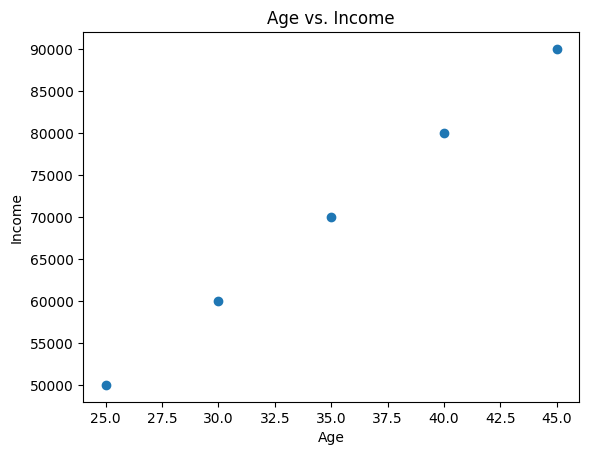

In [28]:
import matplotlib.pyplot as plt

# Example data
df = pd.DataFrame({'Age': [25, 30, 35, 40, 45],
                   'Income': [50000, 60000, 70000, 80000, 90000]})

# Plotting a scatter plot
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs. Income')
plt.show()

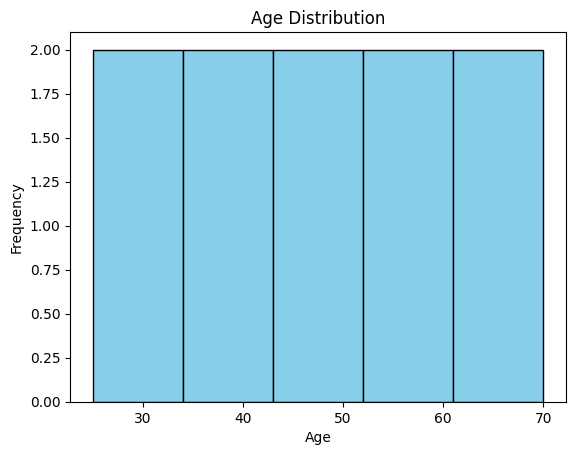

In [30]:
import matplotlib.pyplot as plt

# Example data
data = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Plotting the histogram
plt.hist(data, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

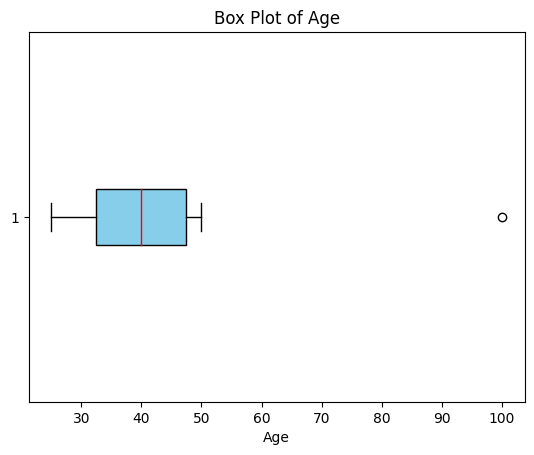

In [31]:
import matplotlib.pyplot as plt

# Example data
data = [25, 30, 35, 40, 45, 50, 100]  # Includes an outlier

# Plotting the box plot
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

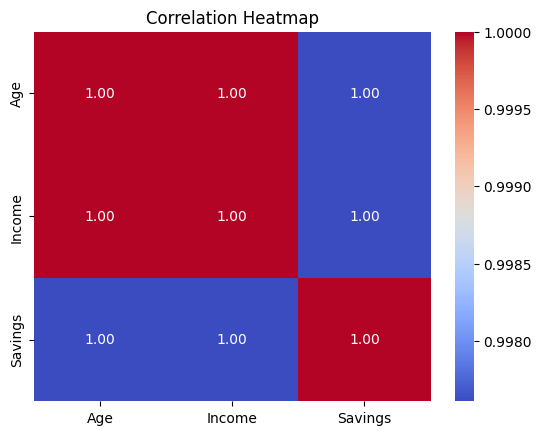

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
data = {'Age': [25, 30, 35, 40, 45],
        'Income': [50000, 60000, 70000, 80000, 90000],
        'Savings': [5000, 7000, 10000, 12000, 15000]}
df = pd.DataFrame(data)

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
import random

# Example dataset (features and labels)
data = [
    [1, 2, 1],  # [feature1, feature2, label]
    [3, 4, 0],
    [5, 6, 1],
    [7, 8, 0],
    [9, 10, 1]
]

# Shuffle the dataset
random.shuffle(data)

# Define the split ratio
train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(train_ratio * len(data))

# Split the data into training and testing sets
train_data = data[:split_index]
test_data = data[split_index:]

# Separate features and labels
train_features = [row[:-1] for row in train_data]
train_labels = [row[-1] for row in train_data]
test_features = [row[:-1] for row in test_data]
test_labels = [row[-1] for row in test_data]

# Print the results
print("Training Features:", train_features)
print("Training Labels:", train_labels)
print("Testing Features:", test_features)
print("Testing Labels:", test_labels)

Training Features: [[3, 4], [5, 6], [1, 2], [7, 8]]
Training Labels: [0, 1, 1, 0]
Testing Features: [[9, 10]]
Testing Labels: [1]


In [35]:
from sklearn.datasets import load_iris
import pandas as pd
# Load the dataset
iris = load_iris()

# Create a DataFrame for easier visualization
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [36]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (120, 4)
Testing Features Shape: (30, 4)
Training Labels Shape: (120,)
Testing Labels Shape: (30,)


In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

print("Predictions:", y_pred)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [39]:
# SVM

In [41]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Ensure labels are +1 or -1

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)

# Example dataset
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])

# Train SVM
svm = SVM()
svm.fit(X, y)

# Make predictions
predictions = svm.predict(X)
print("Predictions:", predictions)

Predictions: [ 1.  1.  1. -1. -1.]


In [45]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to compute custom accuracy defined by our implementation
def custom_accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Train SVM with different kernels and compare accuracy
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\nKernel: {kernel}")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Compute and print accuracy
    acc = custom_accuracy(y_test, y_pred)
    sklearn_acc = accuracy_score(y_test, y_pred)

    print(f"Custom Accuracy: {acc:.4f}")
    print(f"Sklearn Accuracy: {sklearn_acc:.4f}")

    # Store results
    results[kernel] = acc

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Print summary of results
print("\nSummary of Accuracies for Different Kernels:")
for kernel, acc in results.items():
    print(f"{kernel.capitalize()} Kernel: {acc:.4f}")



Kernel: linear
Custom Accuracy: 1.0000
Sklearn Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Kernel: poly
Custom Accuracy: 0.8333
Sklearn Accuracy: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.74      1.00      0.85        14
           2       1.00      0.25      0.40         8

    accuracy                           0.83        36
   macro avg       0.89      0.75      0.74        36
weighted avg       0.87      0.83      0.79        36


Kernel: rbf
Custom Accuracy: 0.8056
Sklearn Accuracy: 0.8056
Cl

/home/gobi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gobi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gobi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/tmp/ipykernel_211668/3061756085.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes[idx].legend(handles, labels=iris.target_names, title="Classes")
/tmp/ipykernel_211668/3061756085.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes[idx].legend(handles, labels=iris.target_names, title="Classes")
/tmp/ipykernel_211668/3061756085.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes[idx].legend(handles, labels=iris.target_names, title="Classes")
/tmp/ipykernel_211668/3061756085.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axes[idx].legend(handles, labels=iris.target_names, title="Classes")


IndexError: list index out of range

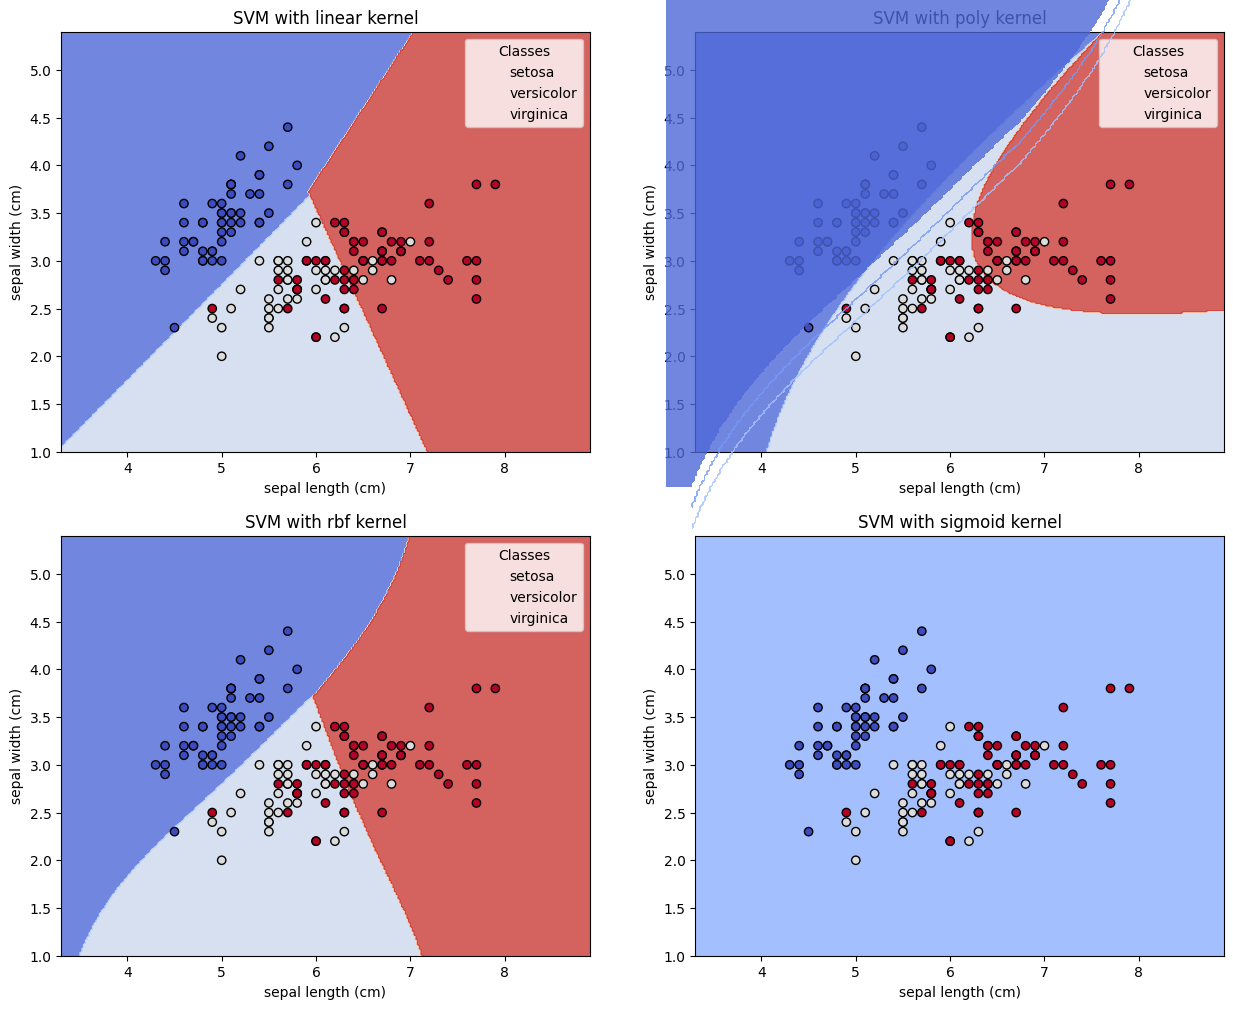

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length, sepal width)
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define kernels to visualize
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()  # Flatten the axes for easier indexing

for idx, kernel in enumerate(kernels):
    # Train SVM
    svm = SVC(kernel=kernel, gamma='auto')  # For non-linear kernels, gamma is important
    svm.fit(X_train, y_train)

    # Create a mesh grid for plotting decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict over the grid (flatten the mesh grid for prediction)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = svm.predict(grid_points)  # Predict the labels for the grid points
    Z = Z.reshape(xx.shape)  # Reshape the predictions to match the grid shape

    # Plot decision boundaries
    axes[idx].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = axes[idx].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    axes[idx].set_title(f"SVM with {kernel} kernel")
    axes[idx].set_xlabel(iris.feature_names[0])
    axes[idx].set_ylabel(iris.feature_names[1])

    # Add legend
    handles, labels = scatter.legend_elements()
    axes[idx].legend(handles, labels=iris.target_names, title="Classes")

plt.tight_layout()
plt.show()


In [52]:
	from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize the SVM model
svm = SVC(kernel='linear')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X, y, cv=5)  # cv=5 for 5 folds

# Print the average accuracy across folds
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average accuracy: 0.9800000000000001


In [51]:
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5)

# Perform stratified K-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# Train and evaluate your model here, e.g., SVM
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print("Fold accuracy:", accuracy)

Fold accuracy: 0.3333333333333333


/home/gobi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


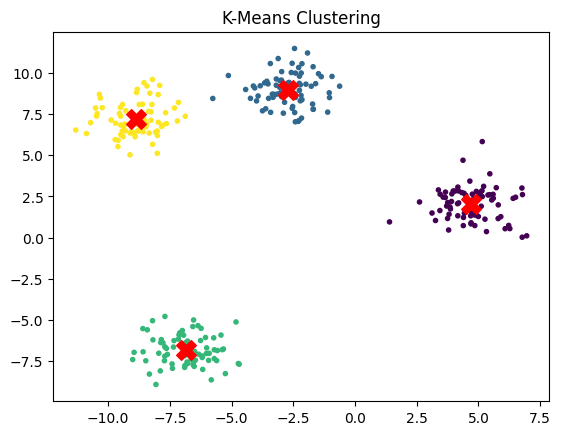

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate example data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='.')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title('K-Means Clustering')
plt.show()

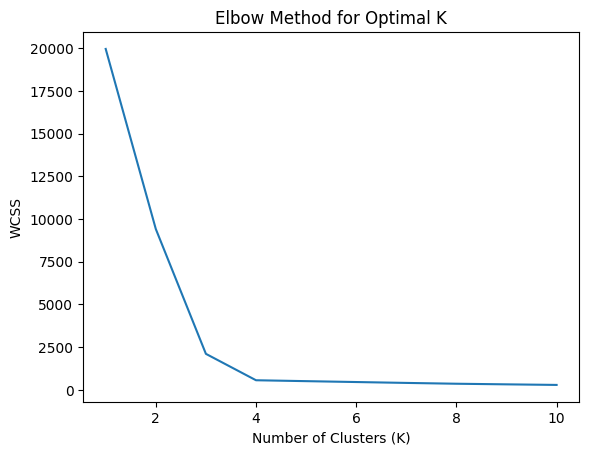

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate example data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Calculate WCSS for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)  # fit the model
    wcss.append(kmeans.inertia_)  # append the WCSS for this K

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [57]:
	from sklearn.metrics import silhouette_score

# Compute the silhouette score for K-Means
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.36


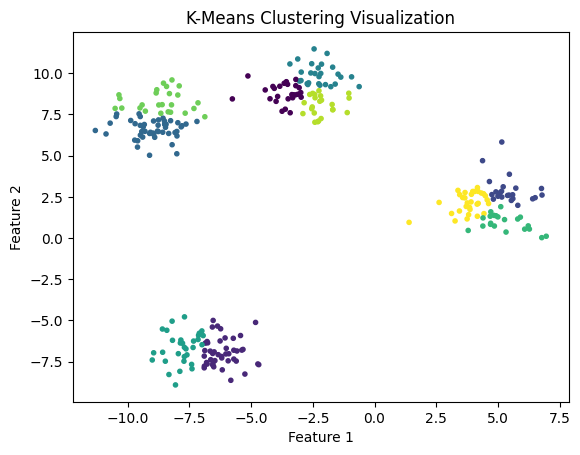

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='.')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

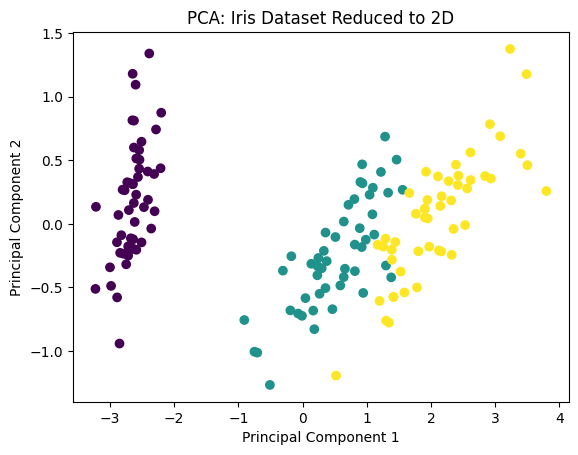

In [59]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.title('PCA: Iris Dataset Reduced to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

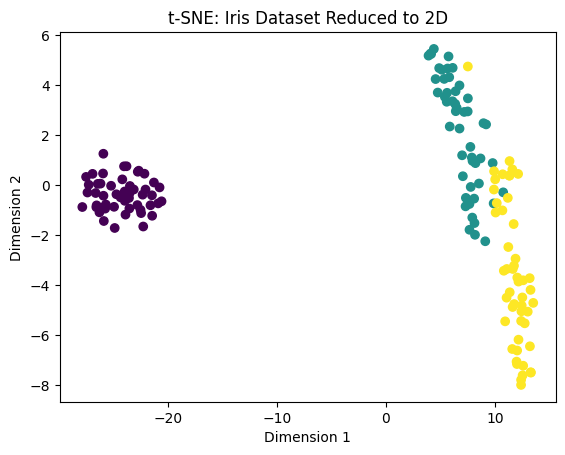

In [60]:
	from sklearn.manifold import TSNE

# Perform t-SNE to reduce the data to 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plotting the reduced data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target, cmap='viridis')
plt.title('t-SNE: Iris Dataset Reduced to 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))  # Hidden layer with 10 neurons
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes (softmax for multi-class classification)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1]:.2f}')

ModuleNotFoundError: No module named 'keras'

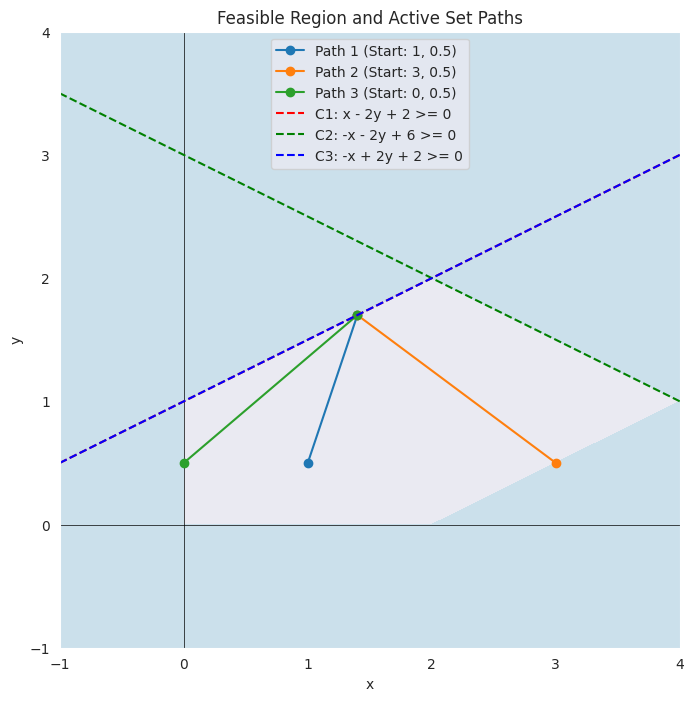

[array([1.39999999, 1.7       ]),
 array([1.39999999, 1.7       ]),
 array([1.39999999, 1.69999999])]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the objective function
def objective(vars):
    x, y = vars
    return (x - 1)**2 + (y - 2.5)**2

# Constraints in the form g(x, y) >= 0
def constraint1(vars):
    x, y = vars
    return x - 2*y + 2

def constraint2(vars):
    x, y = vars
    return -x - 2*y + 6

def constraint3(vars):
    x, y = vars
    return -x + 2*y + 2

def constraint4(vars):
    x, y = vars
    return x  # x >= 0

def constraint5(vars):
    x, y = vars
    return y  # y >= 0

# Combine constraints
constraints = [
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3},
    {'type': 'ineq', 'fun': constraint4},
    {'type': 'ineq', 'fun': constraint5}
]

# Feasible region bounds
x = np.linspace(-1, 4, 400)
y = np.linspace(-1, 4, 400)
X, Y = np.meshgrid(x, y)

# Constraint equations
C1 = X - 2*Y + 2
C2 = -X - 2*Y + 6
C3 = -X + 2*Y + 2
C4 = X
C5 = Y

# Plot the feasible region
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, np.minimum.reduce([C1, C2, C3, C4, C5]), levels=[-10, 0], colors=["lightblue"], alpha=0.5)
plt.title("Feasible Region and Active Set Paths")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)

# Starting points
starting_points = [(1, 0.5), (3, 0.5), (0, 0.5)]
paths = []

for i, (x0, y0) in enumerate(starting_points):
    # Solve the optimization problem
    result = minimize(objective, x0=(x0, y0), constraints=constraints, method="SLSQP")
    paths.append(result.x)
    # Plot path
    plt.plot([x0, result.x[0]], [y0, result.x[1]], label=f"Path {i+1} (Start: {x0}, {y0})", marker='o')

# Plot constraints for clarity
plt.plot(x, (x+2)/2, label="C1: x - 2y + 2 >= 0", linestyle="--", color="red")
plt.plot(x, (6-x)/2, label="C2: -x - 2y + 6 >= 0", linestyle="--", color="green")
plt.plot(x, (x+2)/2, label="C3: -x + 2y + 2 >= 0", linestyle="--", color="blue")

plt.legend()
plt.grid()
plt.show()

# Print paths for clarity
paths
